In [4]:
import pandas as pd
import numpy as np
import datetime

In [5]:
Data_2018=pd.read_csv(r'C:\Users/richa/Downloads/NBA Data/BOS-2018_Raw.csv')
Data_2019=pd.read_csv(r'C:\Users\richa\Downloads\NBA Data\BOS-2019_Raw.csv')
Data_2020=pd.read_csv(r'C:\Users\richa\Downloads\NBA Data\BOS-2020_Raw.csv')
Data_2021=pd.read_csv(r'C:\Users\richa\Downloads\NBA Data\BOS-2021_Raw.csv')
Data_2022=pd.read_csv(r'C:\Users\richa\Downloads\NBA Data\BOS-2022_Raw.csv')
Data_2023=pd.read_csv(r'C:\Users\richa\Downloads\NBA Data\BOS-2023_Raw.csv')

In [6]:
Data_2018['Year']=2018
Data_2019['Year']=2019
Data_2020['Year']=2020
Data_2021['Year']=2021
Data_2022['Year']=2022
Data_2023['Year']=2023

In [7]:
df=pd.concat([Data_2018,Data_2019,Data_2020,Data_2021,Data_2022,Data_2023])

In [8]:
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df['Time_48'] = pd.to_timedelta(df['Time_48'])
# get the minutes and seconds as separate columns
df['Seconds'] = df['Time_48'].dt.total_seconds()

In [10]:
df["BOS_Tech"] = np.where((df["Raw"].str.contains("Technical foul"))& (df["Team"] == 'BOS'), 1, 0)
df["OPP_Tech"] = np.where((df["Raw"].str.contains("Technical foul"))& (df["Team"] != 'BOS'), 1, 0)

df["BOS_PF"] = np.where((df["Raw"].str.contains("foul")) & (df["Team"] != 'BOS') & (df['OPP_Tech'] != 1), 1, 0)
df["OPP_PF"] = np.where((df["Raw"].str.contains("foul")) & (df["Team"] == 'BOS') & (df['BOS_Tech'] != 1), 1, 0)

df["BOS_FTM"] = np.where((df["Raw"].str.contains("makes free throw"))& (df["Team"] == 'BOS'), 1, 0)
df["BOS_FTA"]= np.where((df["Raw"].str.contains("free throw"))& (df["Team"] == 'BOS'), 1, 0)
df["OPP_FTM"] = np.where((df["Raw"].str.contains("makes free throw"))& (df["Team"] != 'BOS'), 1, 0)
df["OPP_FTA"]= np.where((df["Raw"].str.contains("free throw"))& (df["Team"] != 'BOS'), 1, 0)

df["BOS_FG"]= np.where(((df["Raw"].str.contains("makes 2-pt"))|(df["Raw"].str.contains("makes 3-pt")))& (df["Team"] == 'BOS'), 1, 0)
df["BOS_FGA"]= np.where(((df["Raw"].str.contains("2-pt"))|(df["Raw"].str.contains("3-pt")))& (df["Team"] == 'BOS'), 1, 0)
df["OPP_FG"]= np.where(((df["Raw"].str.contains("makes 2-pt"))|(df["Raw"].str.contains("makes 3-pt")))& (df["Team"] != 'BOS'), 1, 0)
df["OPP_FGA"]= np.where(((df["Raw"].str.contains("2-pt"))|(df["Raw"].str.contains("3-pt")))& (df["Team"] != 'BOS'), 1, 0)

df["BOS_3P"]= np.where((df["Raw"].str.contains("makes 3-pt"))& (df["Team"] == 'BOS'), 1, 0)
df["BOS_3PA"]= np.where((df["Raw"].str.contains("3-pt"))& (df["Team"] == 'BOS'), 1, 0)
df["OPP_3P"]= np.where((df["Raw"].str.contains("makes 3-pt"))& (df["Team"] != 'BOS'), 1, 0)
df["OPP_3PA"]= np.where((df["Raw"].str.contains("3-pt"))& (df["Team"] != 'BOS'), 1, 0)

df["BOS_BLK"] = np.where((df["Raw"].str.contains("block")) & (df["Team"] != 'BOS'), 1, 0)
df["OPP_BLK"] = np.where((df["Raw"].str.contains("block")) & (df["Team"] == 'BOS'), 1, 0)

df["BOS_ST"] = np.where((df["Raw"].str.contains("steal")) & (df["Team"] != 'BOS'), 1, 0)
df["OPP_ST"] = np.where((df["Raw"].str.contains("steal")) & (df["Team"] == 'BOS'), 1, 0)

df["BOS_TO"] = np.where((df["Raw"].str.contains("Turnover")) & (df["Team"] == 'BOS'), 1, 0)
df["OPP_TO"] = np.where((df["Raw"].str.contains("Turnover")) & (df["Team"] != 'BOS'), 1, 0)

df["BOS_AST"] = np.where((df["Raw"].str.contains("assist")) & (df["Team"] == 'BOS'), 1, 0)
df["OPP_AST"] = np.where((df["Raw"].str.contains("assist")) & (df["Team"] != 'BOS'), 1, 0)

df["BOS_teamORB"] = np.where((df["Raw"].str.contains("Offensive rebound by Team")) & (df["Team"] == 'BOS'), 1, 0)
df["OPP_teamORB"] = np.where((df["Raw"].str.contains("Offensive rebound by Team")) & (df["Team"] != 'BOS'), 1, 0)

df["BOS_teamDRB"] = np.where((df["Raw"].str.contains("Defensive rebound by Team")) & (df["Team"] == 'BOS'), 1, 0)
df["OPP_teamDRB"] = np.where((df["Raw"].str.contains("Defensive rebound by Team")) & (df["Team"] != 'BOS'), 1, 0)

df["BOS_ORB"] = np.where((df["Raw"].str.contains("Offensive rebound")) & (df["Team"] == 'BOS') & (df['BOS_teamORB'] != 1), 1, 0)
df["OPP_ORB"] = np.where((df["Raw"].str.contains("Offensive rebound")) & (df["Team"] != 'BOS') & (df['OPP_teamORB'] != 1), 1, 0)

df["BOS_DRB"] = np.where((df["Raw"].str.contains("Defensive rebound")) & (df["Team"] == 'BOS') & (df['BOS_teamDRB'] != 1), 1, 0)
df["OPP_DRB"] = np.where((df["Raw"].str.contains("Defensive rebound")) & (df["Team"] != 'BOS') & (df['OPP_teamDRB'] != 1), 1, 0)

In [11]:
# Group by Game and Year, and perform cumsum on specified columns
cumulative_columns = ['BOS_Tech', 'OPP_Tech', 'BOS_PF', 'OPP_PF',
                      'BOS_FTM', 'BOS_FTA', 'OPP_FTM', 'OPP_FTA',
                      'BOS_FG', 'BOS_FGA', 'OPP_FG', 'OPP_FGA',
                      'BOS_3P', 'BOS_3PA', 'OPP_3P', 'OPP_3PA',
                      'BOS_BLK', 'OPP_BLK', 'BOS_ST', 'OPP_ST',
                      'BOS_TO', 'OPP_TO', 'BOS_AST', 'OPP_AST',
                      'BOS_teamORB', 'OPP_teamORB', 'BOS_teamDRB',
                      'OPP_teamDRB', 'BOS_ORB', 'OPP_ORB', 'BOS_DRB',
                      'OPP_DRB']
df[cumulative_columns] = df.groupby(['Game', 'Year'])[cumulative_columns].cumsum()

In [84]:
JT_JB=df[(df['Raw'].str.contains("J. Tatum"))|(df['Raw'].str.contains("J. Brown"))].copy()
JT_JB

,BOS_Score,Home_Away,OPP_Score,Raw,Team,Time,Q,Time_48,Result,Game,Year,Seconds,BOS_Tech,OPP_Tech,BOS_PF,OPP_PF,BOS_FTM,BOS_FTA,OPP_FTM,OPP_FTA,BOS_FG,BOS_FGA,OPP_FG,OPP_FGA,BOS_3P,BOS_3PA,OPP_3P,OPP_3PA,BOS_BLK,OPP_BLK,BOS_ST,OPP_ST,BOS_TO,OPP_TO,BOS_AST,OPP_AST,BOS_teamORB,OPP_teamORB,BOS_teamDRB,OPP_teamDRB,BOS_ORB,OPP_ORB,BOS_DRB,OPP_DRB
8,2.0,0.0,0.0,Defensive rebound by J. Brown,BOS,1900-01-01 00:10:59,Q1,0 days 00:01:01,OPP,1,2018,61.0,0,0,0,0,0,0,0,0,1,2,0,2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1
9,2.0,0.0,0.0,J. Tatum misses 2-pt layup from 2 ft (block by...,BOS,1900-01-01 00:10:51,Q1,0 days 00:01:09,OPP,1,2018,69.0,0,0,0,0,0,0,0,0,1,3,0,2,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,2,1
12,4.0,0.0,0.0,Def 3 sec tech foul by J. Tatum,CLE,1900-01-01 00:10:32,Q1,0 days 00:01:28,OPP,1,2018,88.0,0,0,1,0,0,0,0,0,2,4,0,2,0,1,0,0,1,1,0,0,0,0,2,0,1,0,0,0,0,0,2,1
15,4.0,0.0,3.0,Turnover by J. Brown (palming),BOS,1900-01-01 00:10:05,Q1,0 days 00:01:55,OPP,1,2018,115.0,0,0,1,0,0,0,0,1,2,4,1,3,0,1,0,0,1,1,0,0,1,0,2,1,1,0,0,0,0,0,2,1
16,4.0,0.0,3.0,Personal foul by J. Tatum (drawn by D. Wade),CLE,1900-01-01 00:09:56,Q1,0 days 00:02:04,OPP,1,2018,124.0,0,0,2,0,0,0,0,1,2,4,1,3,0,1,0,0,1,1,0,0,1,0,2,1,1,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37237,67.0,1.0,32.0,Turnover by J. Tatum (bad pass),BOS,1900-01-01 00:01:29,Q2,0 days 00:22:31,BOS,82,2023,1351.0,0,0,7,8,10,11,3,5,24,39,13,47,9,24,3,14,7,1,2,7,11,4,20,7,2,1,0,0,7,8,27,7
37245,67.0,1.0,38.0,J. Tatum misses 3-pt jump shot from 27 ft,BOS,1900-01-01 00:00:33,Q2,0 days 00:23:27,BOS,82,2023,1407.0,0,0,8,8,10,11,5,7,24,40,15,49,9,25,3,14,7,1,2,9,13,4,20,9,2,1,0,0,7,8,27,7
37250,67.0,1.0,40.0,Personal foul by P. Siakam (drawn by J. Tatum),BOS,1900-01-01 00:00:05,Q2,0 days 00:23:55,BOS,82,2023,1435.0,0,0,9,9,10,11,7,9,24,40,15,49,9,25,3,14,7,1,2,9,13,4,20,9,2,1,0,0,7,8,27,8
37251,67.0,1.0,40.0,J. Tatum misses free throw 1 of 2,BOS,1900-01-01 00:00:05,Q2,0 days 00:23:55,BOS,82,2023,1435.0,0,0,9,9,10,12,7,9,24,40,15,49,9,25,3,14,7,1,2,9,13,4,20,9,2,1,0,0,7,8,27,8


In [88]:
import pandas as pd
import numpy as np
import re

# extract type and distance of shot attempted
JT_JB['Shot_Result']=np.where(JT_JB['Raw'].str.contains('makes'),1,np.where(JT_JB['Raw'].str.contains('misses'),0,np.nan))
JT_JB['Shot_Type'] = JT_JB['Raw'].apply(lambda x: re.findall(r'\b(layup|dunk|2-pt jumpshot|3-pt jump shot|free throw)\b', x)[0] if re.findall(r'\b(layup|dunk|2-pt jumpshot|3-pt jump shot|free throw)\b', x) else '')
JT_JB['Distance'] = JT_JB['Raw'].str.extract(r'from\s(\d+|\d+\.\d+)\sft')
JT_JB['Distance'] = pd.to_numeric(JT_JB['Distance'], errors='coerce')
JT_JB['Distance'] = JT_JB['Distance'].fillna(0)

# extract assist by
JT_JB['Assist By'] = JT_JB['Raw'].str.extract(r'\(assist by\s(.+?)\)')

# JT
JT_JB['JT_FG']= np.where(((JT_JB["Raw"].str.contains("J. Tatum makes 2-pt"))|(JT_JB["Raw"].str.contains("J. Tatum makes 3-pt"))), 1, 0)
JT_JB['JT_FGA']= np.where(((JT_JB["Raw"].str.contains("J. Tatum misses 2-pt"))|(JT_JB["Raw"].str.contains("J. Tatum misses 3-pt"))|(JT_JB["Raw"].str.contains("J. Tatum makes 2-pt"))|(JT_JB["Raw"].str.contains("J. Tatum makes 3-pt"))), 1, 0)
JT_JB["JT_3P"]= np.where((JT_JB["Raw"].str.contains("J. Tatum makes 3-pt")), 1, 0)
JT_JB["JT_3PA"]= np.where(((JT_JB["Raw"].str.contains("J. Tatum misses 3-pt"))|(JT_JB["Raw"].str.contains("J. Tatum makes 3-pt"))), 1, 0)
JT_JB["JT_FT"]= np.where(((JT_JB["Raw"].str.contains("J. Tatum makes free throw"))|(JT_JB["Raw"].str.contains("J. Tatum makes technical free throw"))), 1, 0)
JT_JB["JT_FTA"]= np.where(((JT_JB["Raw"].str.contains("J. Tatum"))&(JT_JB["Raw"].str.contains("free throw"))), 1, 0)

#JB
JT_JB['JB_FG']= np.where(((JT_JB["Raw"].str.contains("J. Brown makes 2-pt"))|(JT_JB["Raw"].str.contains("J. Brown makes 3-pt"))), 1, 0)
JT_JB['JB_FGA']= np.where(((JT_JB["Raw"].str.contains("J. Brown misses 2-pt"))|(JT_JB["Raw"].str.contains("J. Brown misses 3-pt"))|(JT_JB["Raw"].str.contains("J. Brown makes 2-pt"))|(JT_JB["Raw"].str.contains("J. Brown makes 3-pt"))), 1, 0)
JT_JB["JB_3P"]= np.where((JT_JB["Raw"].str.contains("J. Brown makes 3-pt")), 1, 0)
JT_JB["JB_3PA"]= np.where(((JT_JB["Raw"].str.contains("J. Brown misses 3-pt"))|(JT_JB["Raw"].str.contains("J. Brown makes 3-pt"))), 1, 0)
JT_JB["JB_FT"]= np.where(((JT_JB["Raw"].str.contains("J. Brown makes free throw"))|(JT_JB["Raw"].str.contains("J. Brown makes technical free throw"))), 1, 0)
JT_JB["JB_FTA"]= np.where(((JT_JB["Raw"].str.contains("J. Brown"))&(JT_JB["Raw"].str.contains("free throw"))), 1, 0)

In [89]:
JT_JB

,BOS_Score,Home_Away,OPP_Score,Raw,Team,Time,Q,Time_48,Result,Game,Year,Seconds,BOS_Tech,OPP_Tech,BOS_PF,OPP_PF,BOS_FTM,BOS_FTA,OPP_FTM,OPP_FTA,BOS_FG,BOS_FGA,OPP_FG,OPP_FGA,BOS_3P,BOS_3PA,OPP_3P,OPP_3PA,BOS_BLK,OPP_BLK,BOS_ST,OPP_ST,BOS_TO,OPP_TO,BOS_AST,OPP_AST,BOS_teamORB,OPP_teamORB,BOS_teamDRB,OPP_teamDRB,BOS_ORB,OPP_ORB,BOS_DRB,OPP_DRB,Shot_Result,Shot_Type,Distance,Assist By,JT_FG,JT_FGA,JT_3P,JT_3PA,JT_FT,JT_FTA,JB_FG,JB_FGA,JB_3P,JB_3PA,JB_FT,JB_FTA
8,2.0,0.0,0.0,Defensive rebound by J. Brown,BOS,1900-01-01 00:10:59,Q1,0 days 00:01:01,OPP,1,2018,61.0,0,0,0,0,0,0,0,0,1,2,0,2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1,NaN,,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
9,2.0,0.0,0.0,J. Tatum misses 2-pt layup from 2 ft (block by...,BOS,1900-01-01 00:10:51,Q1,0 days 00:01:09,OPP,1,2018,69.0,0,0,0,0,0,0,0,0,1,3,0,2,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,2,1,0.0,layup,2.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0
12,4.0,0.0,0.0,Def 3 sec tech foul by J. Tatum,CLE,1900-01-01 00:10:32,Q1,0 days 00:01:28,OPP,1,2018,88.0,0,0,1,0,0,0,0,0,2,4,0,2,0,1,0,0,1,1,0,0,0,0,2,0,1,0,0,0,0,0,2,1,NaN,,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
15,4.0,0.0,3.0,Turnover by J. Brown (palming),BOS,1900-01-01 00:10:05,Q1,0 days 00:01:55,OPP,1,2018,115.0,0,0,1,0,0,0,0,1,2,4,1,3,0,1,0,0,1,1,0,0,1,0,2,1,1,0,0,0,0,0,2,1,NaN,,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
16,4.0,0.0,3.0,Personal foul by J. Tatum (drawn by D. Wade),CLE,1900-01-01 00:09:56,Q1,0 days 00:02:04,OPP,1,2018,124.0,0,0,2,0,0,0,0,1,2,4,1,3,0,1,0,0,1,1,0,0,1,0,2,1,1,0,0,0,0,0,2,1,NaN,,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37237,67.0,1.0,32.0,Turnover by J. Tatum (bad pass),BOS,1900-01-01 00:01:29,Q2,0 days 00:22:31,BOS,82,2023,1351.0,0,0,7,8,10,11,3,5,24,39,13,47,9,24,3,14,7,1,2,7,11,4,20,7,2,1,0,0,7,8,27,7,NaN,,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
37245,67.0,1.0,38.0,J. Tatum misses 3-pt jump shot from 27 ft,BOS,1900-01-01 00:00:33,Q2,0 days 00:23:27,BOS,82,2023,1407.0,0,0,8,8,10,11,5,7,24,40,15,49,9,25,3,14,7,1,2,9,13,4,20,9,2,1,0,0,7,8,27,7,0.0,3-pt jump shot,27.0,NaN,0,1,0,1,0,0,0,0,0,0,0,0
37250,67.0,1.0,40.0,Personal foul by P. Siakam (drawn by J. Tatum),BOS,1900-01-01 00:00:05,Q2,0 days 00:23:55,BOS,82,2023,1435.0,0,0,9,9,10,11,7,9,24,40,15,49,9,25,3,14,7,1,2,9,13,4,20,9,2,1,0,0,7,8,27,8,NaN,,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
37251,67.0,1.0,40.0,J. Tatum misses free throw 1 of 2,BOS,1900-01-01 00:00:05,Q2,0 days 00:23:55,BOS,82,2023,1435.0,0,0,9,9,10,12,7,9,24,40,15,49,9,25,3,14,7,1,2,9,13,4,20,9,2,1,0,0,7,8,27,8,0.0,free throw,0.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
# Group by Game and Year, and perform cumsum on specified columns
player_cumulative_columns = ['JT_FG','JT_FGA','JT_3P','JT_3PA','JT_FT','JT_FTA','JB_FG','JB_FGA','JB_3P','JB_3PA','JB_FT','JB_FTA']
JT_JB[player_cumulative_columns] = JT_JB.groupby(['Game', 'Year'])[player_cumulative_columns].cumsum()

In [16]:
JT_JB.replace('', np.nan, inplace=True)

In [17]:
JT=JT_JB[(JT_JB['Raw'].str.contains('J. Tatum'))&(JT_JB['Shot_Type'].notnull())&(JT_JB['Assist By']!='J. Tatum')]
JB=JT_JB[(JT_JB['Raw'].str.contains('J. Brown'))&(JT_JB['Shot_Type'].notnull())&(JT_JB['Assist By']!='J. Brown')]

In [90]:
JT

,BOS_Score,Home_Away,OPP_Score,Raw,Team,Time,Q,Time_48,Result,Game,Year,Seconds,BOS_Tech,OPP_Tech,BOS_PF,OPP_PF,BOS_FTM,BOS_FTA,OPP_FTM,OPP_FTA,BOS_FG,BOS_FGA,OPP_FG,OPP_FGA,BOS_3P,BOS_3PA,OPP_3P,OPP_3PA,BOS_BLK,OPP_BLK,BOS_ST,OPP_ST,BOS_TO,OPP_TO,BOS_AST,OPP_AST,BOS_teamORB,OPP_teamORB,BOS_teamDRB,OPP_teamDRB,BOS_ORB,OPP_ORB,BOS_DRB,OPP_DRB,Shot_Result,Shot_Type,Distance,Assist By,JT_FG,JT_FGA,JT_3P,JT_3PA,JT_FT,JT_FTA,JB_FG,JB_FGA,JB_3P,JB_3PA,JB_FT,JB_FTA
9,2.0,0.0,0.0,J. Tatum misses 2-pt layup from 2 ft (block by...,BOS,1900-01-01 00:10:51,Q1,0 days 00:01:09,OPP,1,2018,69.0,0,0,0,0,0,0,0,0,1,3,0,2,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,2,1,0.0,layup,2.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0
64,14.0,0.0,13.0,J. Tatum misses 2-pt layup at rim,BOS,1900-01-01 00:04:33,Q1,0 days 00:07:27,OPP,1,2018,447.0,0,0,3,2,0,0,2,3,7,17,5,13,0,4,0,3,1,1,1,0,2,2,4,3,1,0,0,0,2,1,7,6,0.0,layup,0.0,NaN,0,2,0,0,0,0,2,4,0,1,0,0
132,21.0,0.0,32.0,J. Tatum misses 3-pt jump shot from 25 ft,BOS,1900-01-01 00:09:56,Q2,0 days 00:14:04,OPP,1,2018,844.0,0,0,9,6,1,1,6,8,10,28,12,25,0,9,1,5,1,1,1,1,5,3,5,8,2,1,0,0,3,1,12,12,0.0,3-pt jump shot,25.0,NaN,0,3,0,1,0,0,3,7,0,3,1,1
143,22.0,0.0,34.0,J. Tatum misses 2-pt layup from 2 ft,BOS,1900-01-01 00:09:06,Q2,0 days 00:14:54,OPP,1,2018,894.0,0,0,9,7,1,2,6,8,10,30,13,27,0,10,1,5,1,1,1,1,5,3,5,9,2,1,0,0,3,1,13,14,0.0,layup,2.0,NaN,0,4,0,1,0,0,3,7,0,3,1,1
210,33.0,0.0,48.0,J. Tatum makes free throw 1 of 2,BOS,1900-01-01 00:02:18,Q2,0 days 00:21:42,OPP,1,2018,1302.0,0,0,14,11,2,3,9,12,14,42,18,38,2,16,2,8,2,1,2,2,8,5,8,12,2,1,0,0,5,2,19,21,1.0,free throw,0.0,NaN,0,4,0,1,1,1,5,11,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,63.0,1.0,31.0,J. Tatum makes free throw 1 of 2,BOS,1900-01-01 00:02:27,Q2,0 days 00:21:33,BOS,82,2023,1293.0,0,0,6,8,9,10,2,3,23,38,13,46,8,23,3,14,7,1,2,7,10,4,19,7,2,1,0,0,7,8,25,7,1.0,free throw,0.0,NaN,7,11,0,4,5,6,0,0,0,0,0,0
37229,64.0,1.0,31.0,J. Tatum makes free throw 2 of 2,BOS,1900-01-01 00:02:27,Q2,0 days 00:21:33,BOS,82,2023,1293.0,0,0,6,8,10,11,2,3,23,38,13,46,8,23,3,14,7,1,2,7,10,4,19,7,2,1,0,0,7,8,25,7,1.0,free throw,0.0,NaN,7,11,0,4,6,7,0,0,0,0,0,0
37245,67.0,1.0,38.0,J. Tatum misses 3-pt jump shot from 27 ft,BOS,1900-01-01 00:00:33,Q2,0 days 00:23:27,BOS,82,2023,1407.0,0,0,8,8,10,11,5,7,24,40,15,49,9,25,3,14,7,1,2,9,13,4,20,9,2,1,0,0,7,8,27,7,0.0,3-pt jump shot,27.0,NaN,7,12,0,5,6,7,0,0,0,0,0,0
37251,67.0,1.0,40.0,J. Tatum misses free throw 1 of 2,BOS,1900-01-01 00:00:05,Q2,0 days 00:23:55,BOS,82,2023,1435.0,0,0,9,9,10,12,7,9,24,40,15,49,9,25,3,14,7,1,2,9,13,4,20,9,2,1,0,0,7,8,27,8,0.0,free throw,0.0,NaN,7,12,0,5,6,8,0,0,0,0,0,0


In [19]:
JT.Distance.mean()

10.227962544397805

<AxesSubplot:xlabel='Shot_Result', ylabel='Distance'>

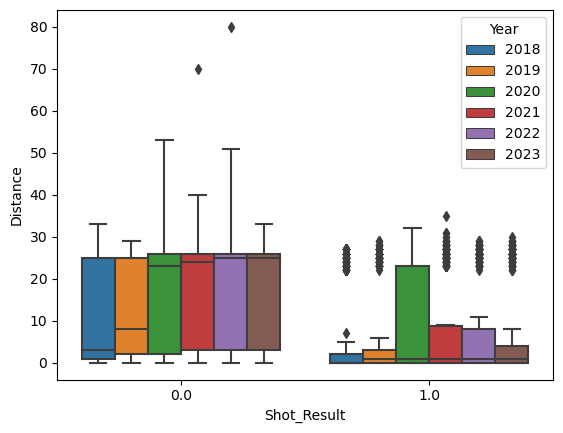

In [20]:
import seaborn as sns
# Create the box plot using Seaborn
sns.boxplot(x='Shot_Result', y='Distance',hue='Year', data=JT)

In [21]:
JB.Distance.mean()

10.443283582089553

<AxesSubplot:xlabel='Shot_Result', ylabel='Distance'>

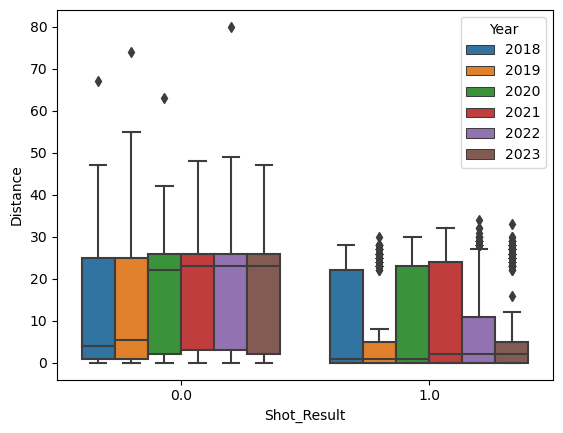

In [22]:
import seaborn as sns
# Create the box plot using Seaborn
sns.boxplot(x='Shot_Result', y='Distance',hue='Year', data=JB)

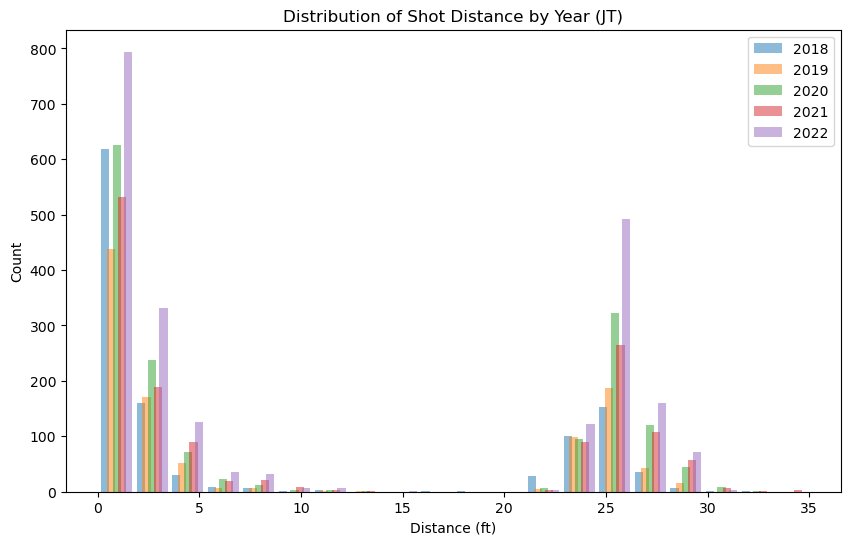

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

bins = 20

data = [JT[JT['Year'] == year]['Distance'] for year in range(2018, 2023)]

ax.hist(data, bins=bins, alpha=0.5,range=[0,35], label=[str(year) for year in range(2018, 2023)], stacked=False, width=8/bins)

ax.set_xlabel('Distance (ft)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Shot Distance by Year (JT)')
ax.legend()

plt.show()


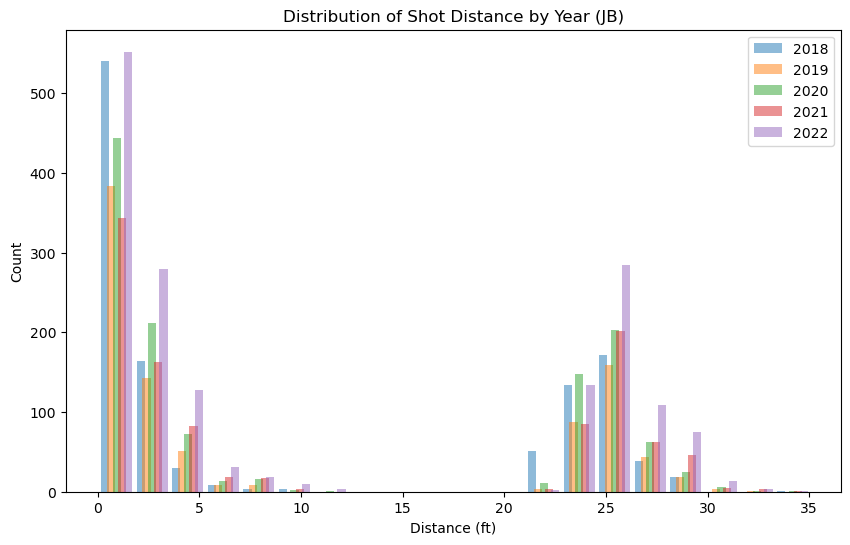

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

bins = 20

data = [JB[JB['Year'] == year]['Distance'] for year in range(2018, 2023)]

ax.hist(data, bins=bins, alpha=0.5,range=[0,35], label=[str(year) for year in range(2018, 2023)], stacked=False, width=8/bins)

ax.set_xlabel('Distance (ft)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Shot Distance by Year (JB)')
ax.legend()

plt.show()


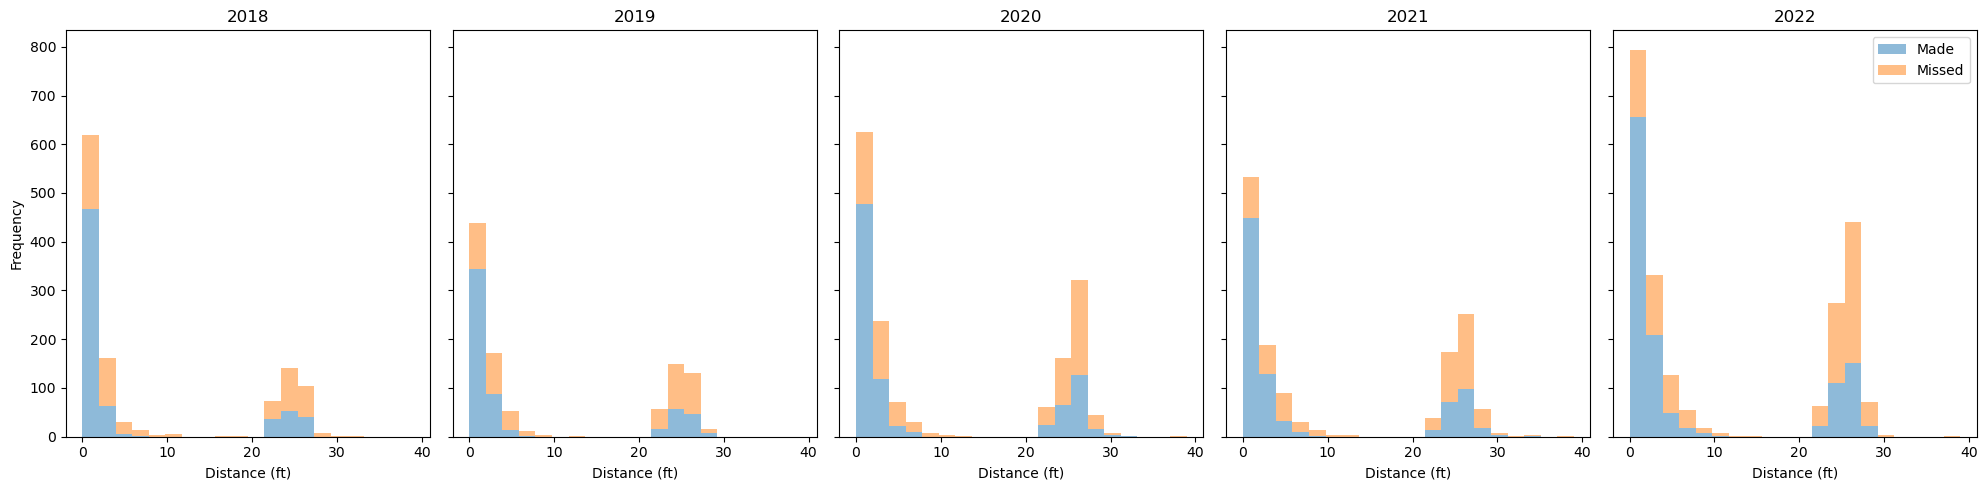

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True,sharex=True)

for i, year in enumerate(range(2018, 2023)):
    data = JT[JT['Year'] == year]
    made = data[data['Shot_Result'] == 1]['Distance'].dropna()
    missed = data[data['Shot_Result'] == 0]['Distance'].dropna()
    axes[i].hist([made, missed], bins=20,range=[0,39], alpha=0.5, label=['Made', 'Missed'], stacked=True)
    axes[i].set_xlabel('Distance (ft)')
    axes[i].set_title(str(year))

axes[0].set_ylabel('Frequency')
axes[-1].legend()

plt.tight_layout()
plt.show()


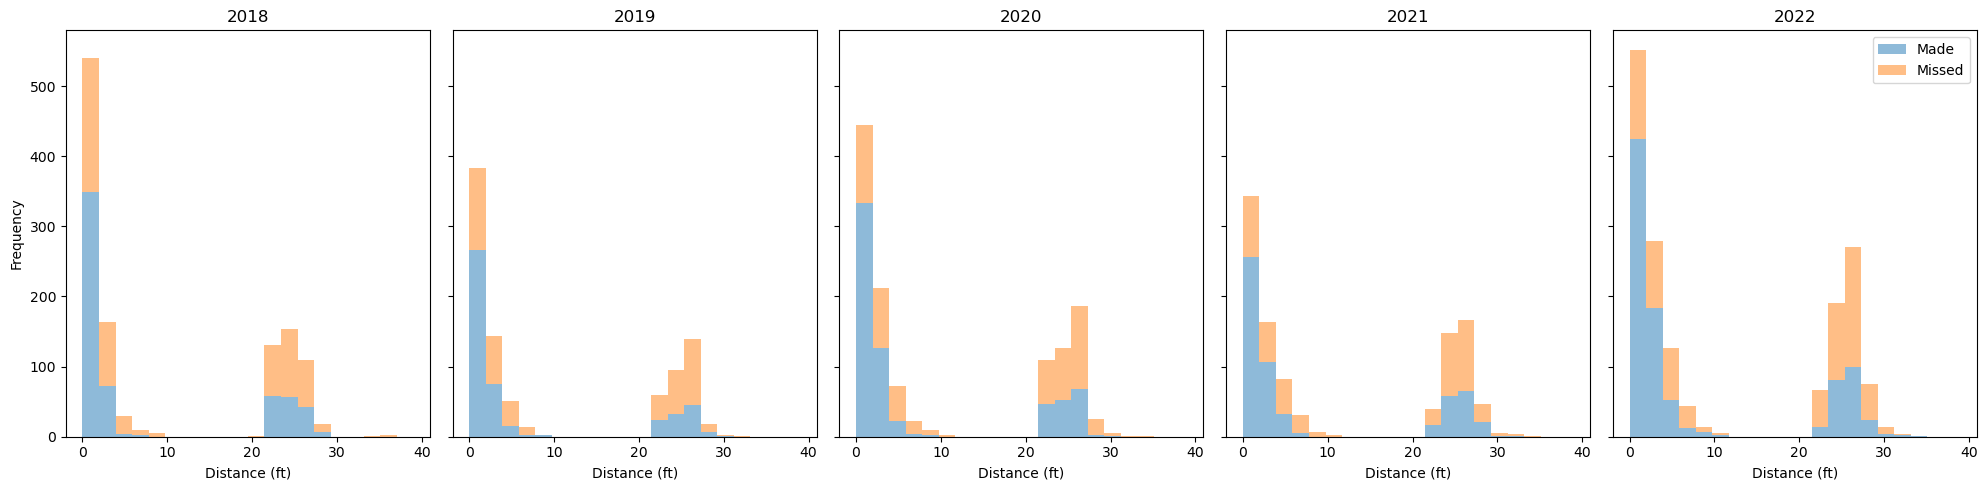

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True,sharex=True)

for i, year in enumerate(range(2018, 2023)):
    data = JB[JB['Year'] == year]
    made = data[data['Shot_Result'] == 1]['Distance'].dropna()
    missed = data[data['Shot_Result'] == 0]['Distance'].dropna()
    axes[i].hist([made, missed], bins=20,range=[0,39], alpha=0.5, label=['Made', 'Missed'], stacked=True)
    axes[i].set_xlabel('Distance (ft)')
    axes[i].set_title(str(year))

axes[0].set_ylabel('Frequency')
axes[-1].legend()

plt.tight_layout()
plt.show()


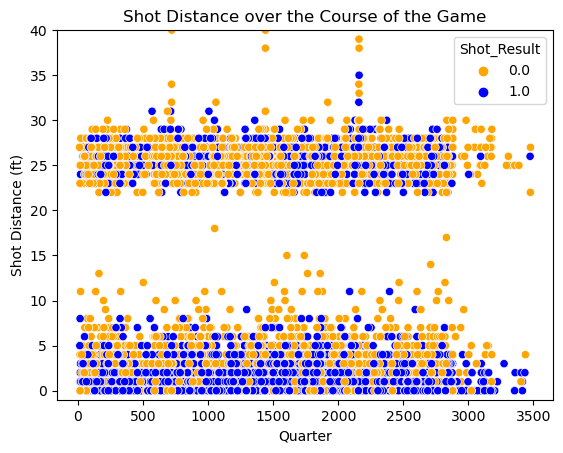

In [27]:
import seaborn as sns
# Create a scatter plot using Seaborn
sns.scatterplot(data=JT, x='Seconds', y='Distance', hue='Shot_Result',
                palette={1.0: "blue", 0.0: "orange"})

# Set the y-axis limits
plt.ylim(-1, 40)
# Add labels and title to the plot
plt.xlabel('Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance over the Course of the Game')
plt.show()

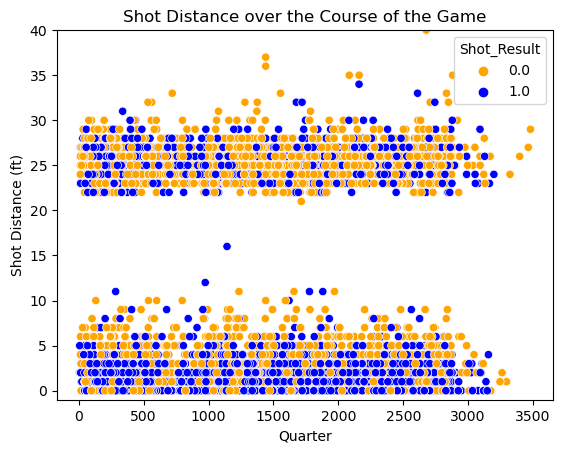

In [28]:
import seaborn as sns
# Create a scatter plot using Seaborn
sns.scatterplot(data=JB, x='Seconds', y='Distance', hue='Shot_Result',
                               palette={1.0: "blue", 0.0: "orange"})

# Set the y-axis limits
plt.ylim(-1, 40)
# Add labels and title to the plot
plt.xlabel('Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance over the Course of the Game')
plt.show()

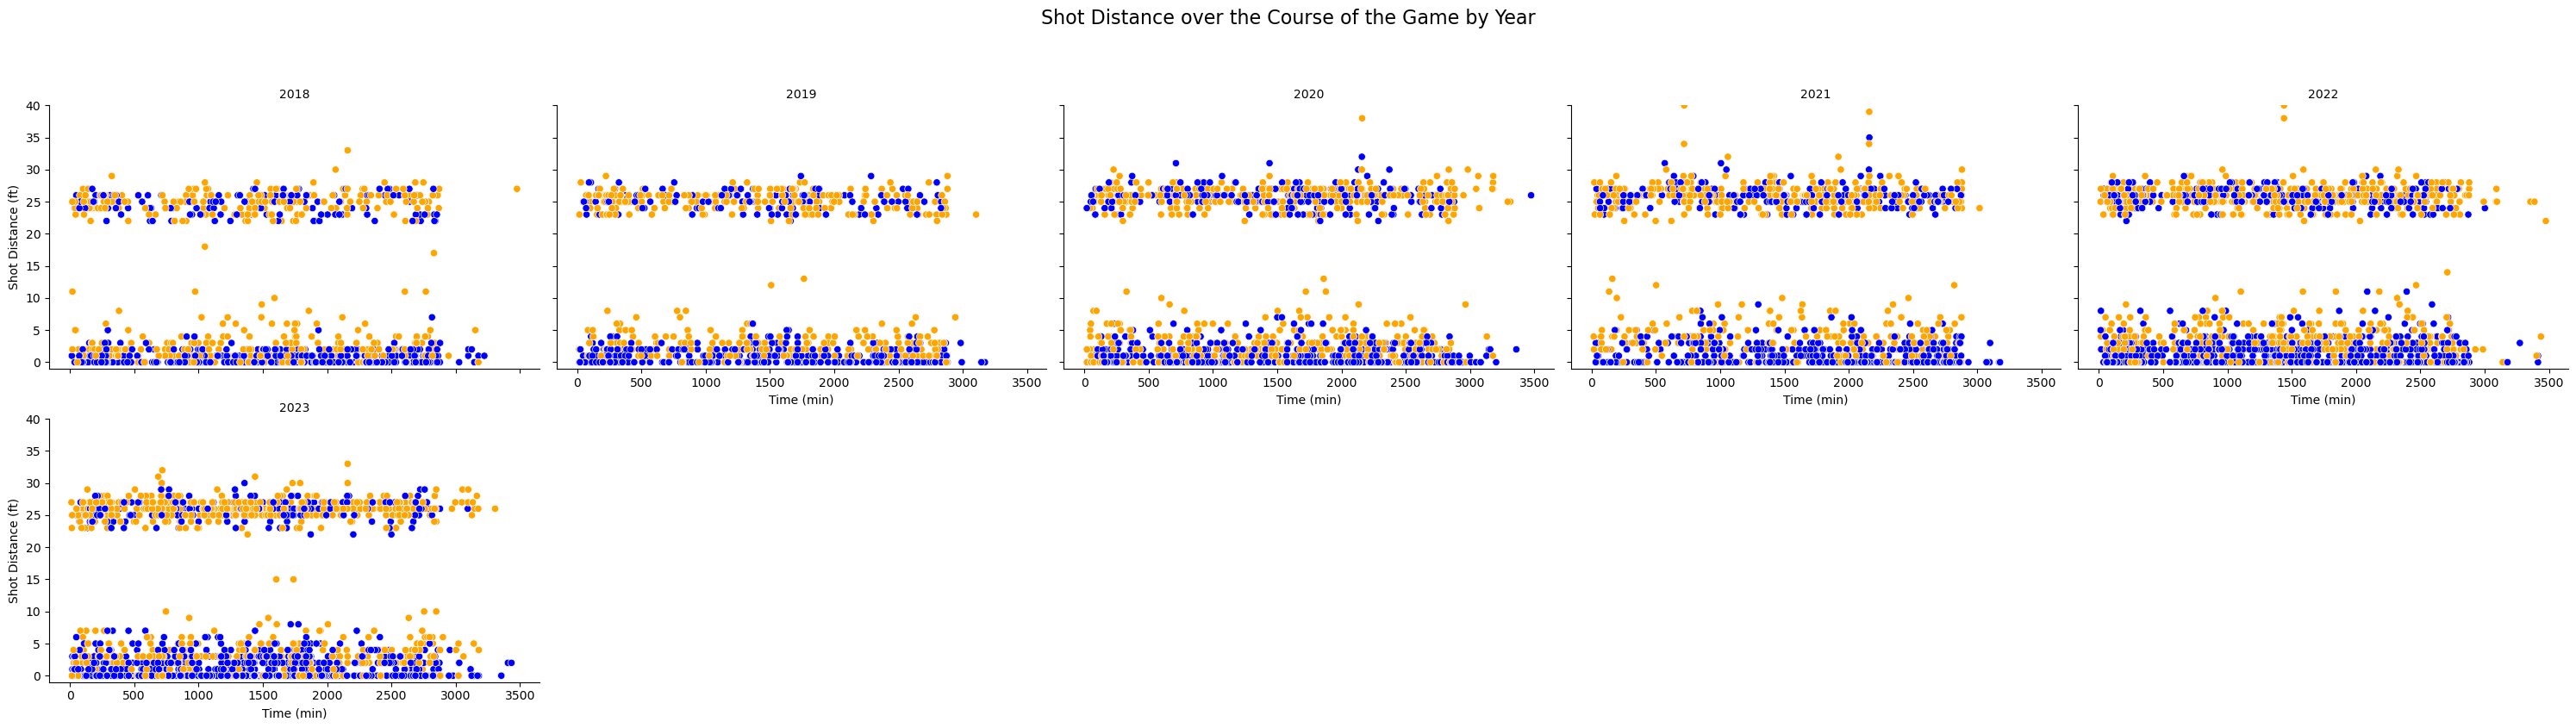

In [29]:
# Create a scatter plot partitioned over years using Seaborn's FacetGrid
g = sns.FacetGrid(data=JT, col='Year', col_wrap=5, height=4, aspect=1.5)
g.map(sns.scatterplot, 'Seconds', 'Distance', 'Shot_Result',
                     palette={1.0: "blue", 0.0: "orange"})

# Add labels and title to the plot
g.set_xlabels('Time (min)')
g.set_ylabels('Shot Distance (ft)')
g.set_titles('{col_name}')
plt.suptitle('Shot Distance over the Course of the Game by Year', y=1.05, fontsize=16)
plt.ylim(-1, 40)
plt.tight_layout()
plt.show()

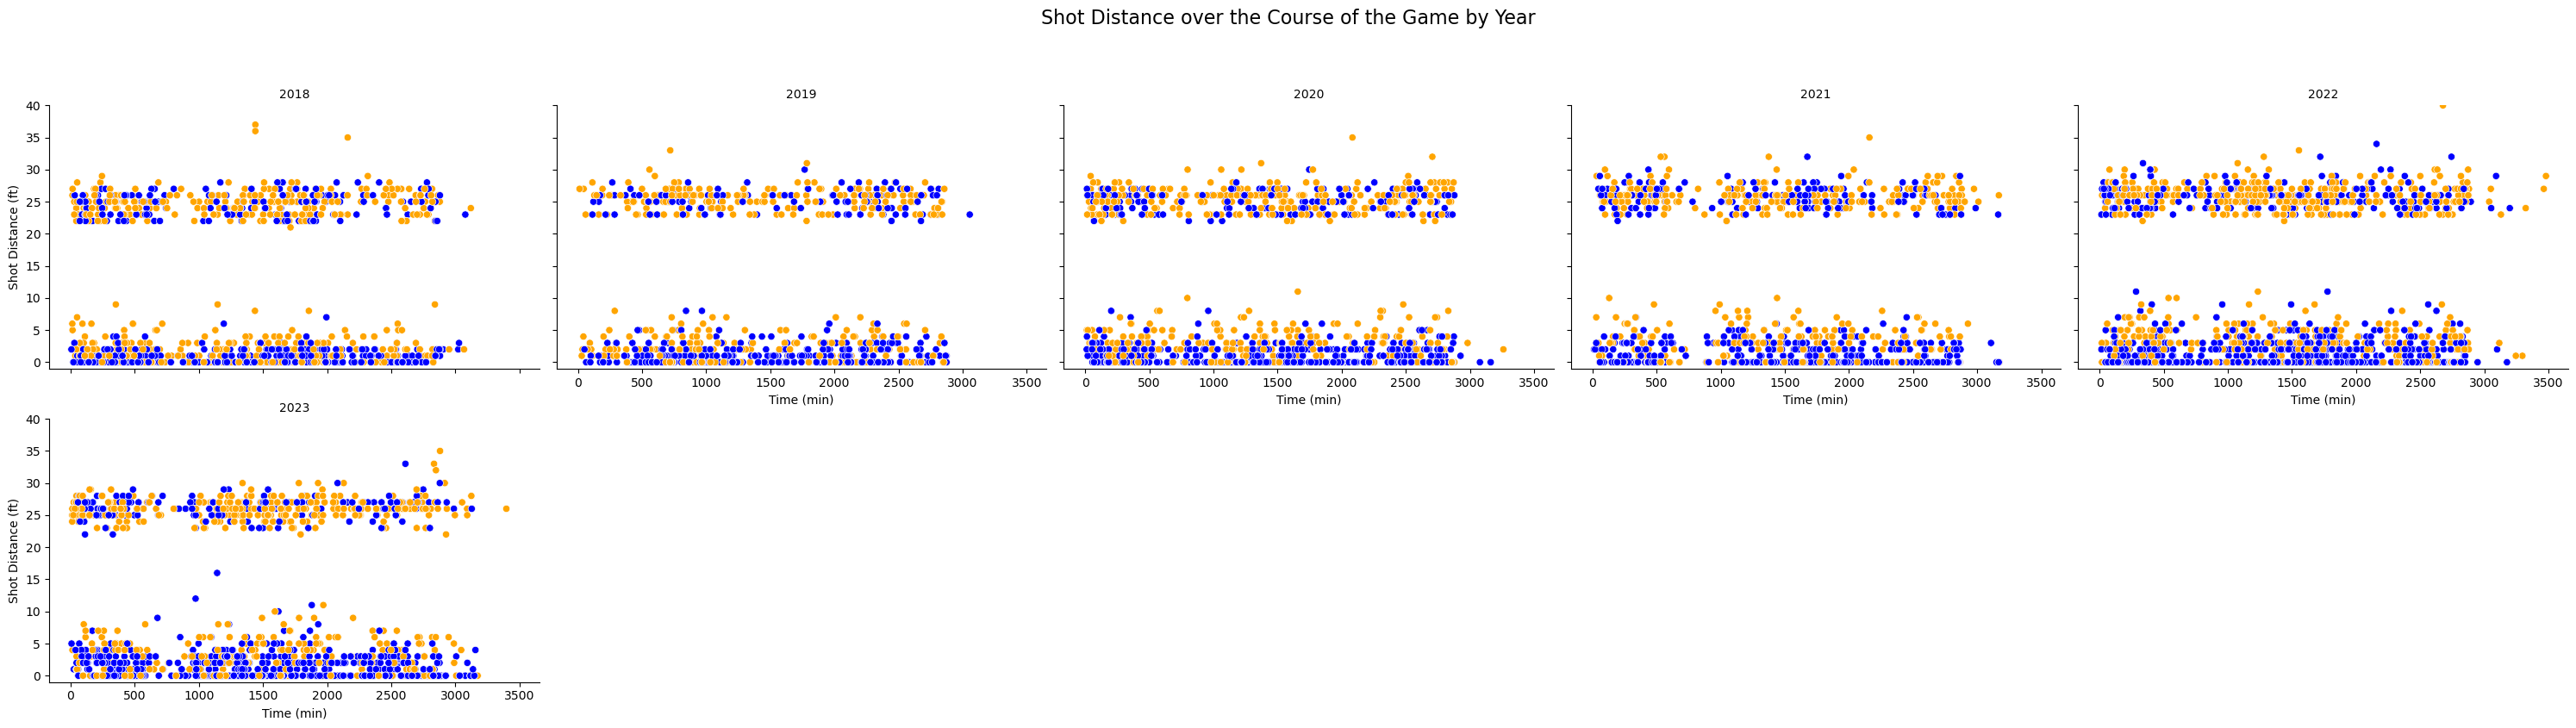

In [30]:
# Create a scatter plot partitioned over years using Seaborn's FacetGrid
g = sns.FacetGrid(data=JB, col='Year', col_wrap=5, height=4, aspect=1.5)
g.map(sns.scatterplot, 'Seconds', 'Distance', 'Shot_Result',
                     palette={1.0: "blue", 0.0: "orange"})

# Add labels and title to the plot
g.set_xlabels('Time (min)')
g.set_ylabels('Shot Distance (ft)')
g.set_titles('{col_name}')
plt.suptitle('Shot Distance over the Course of the Game by Year', y=1.05, fontsize=16)
plt.ylim(-1, 40)
plt.tight_layout()
plt.show()

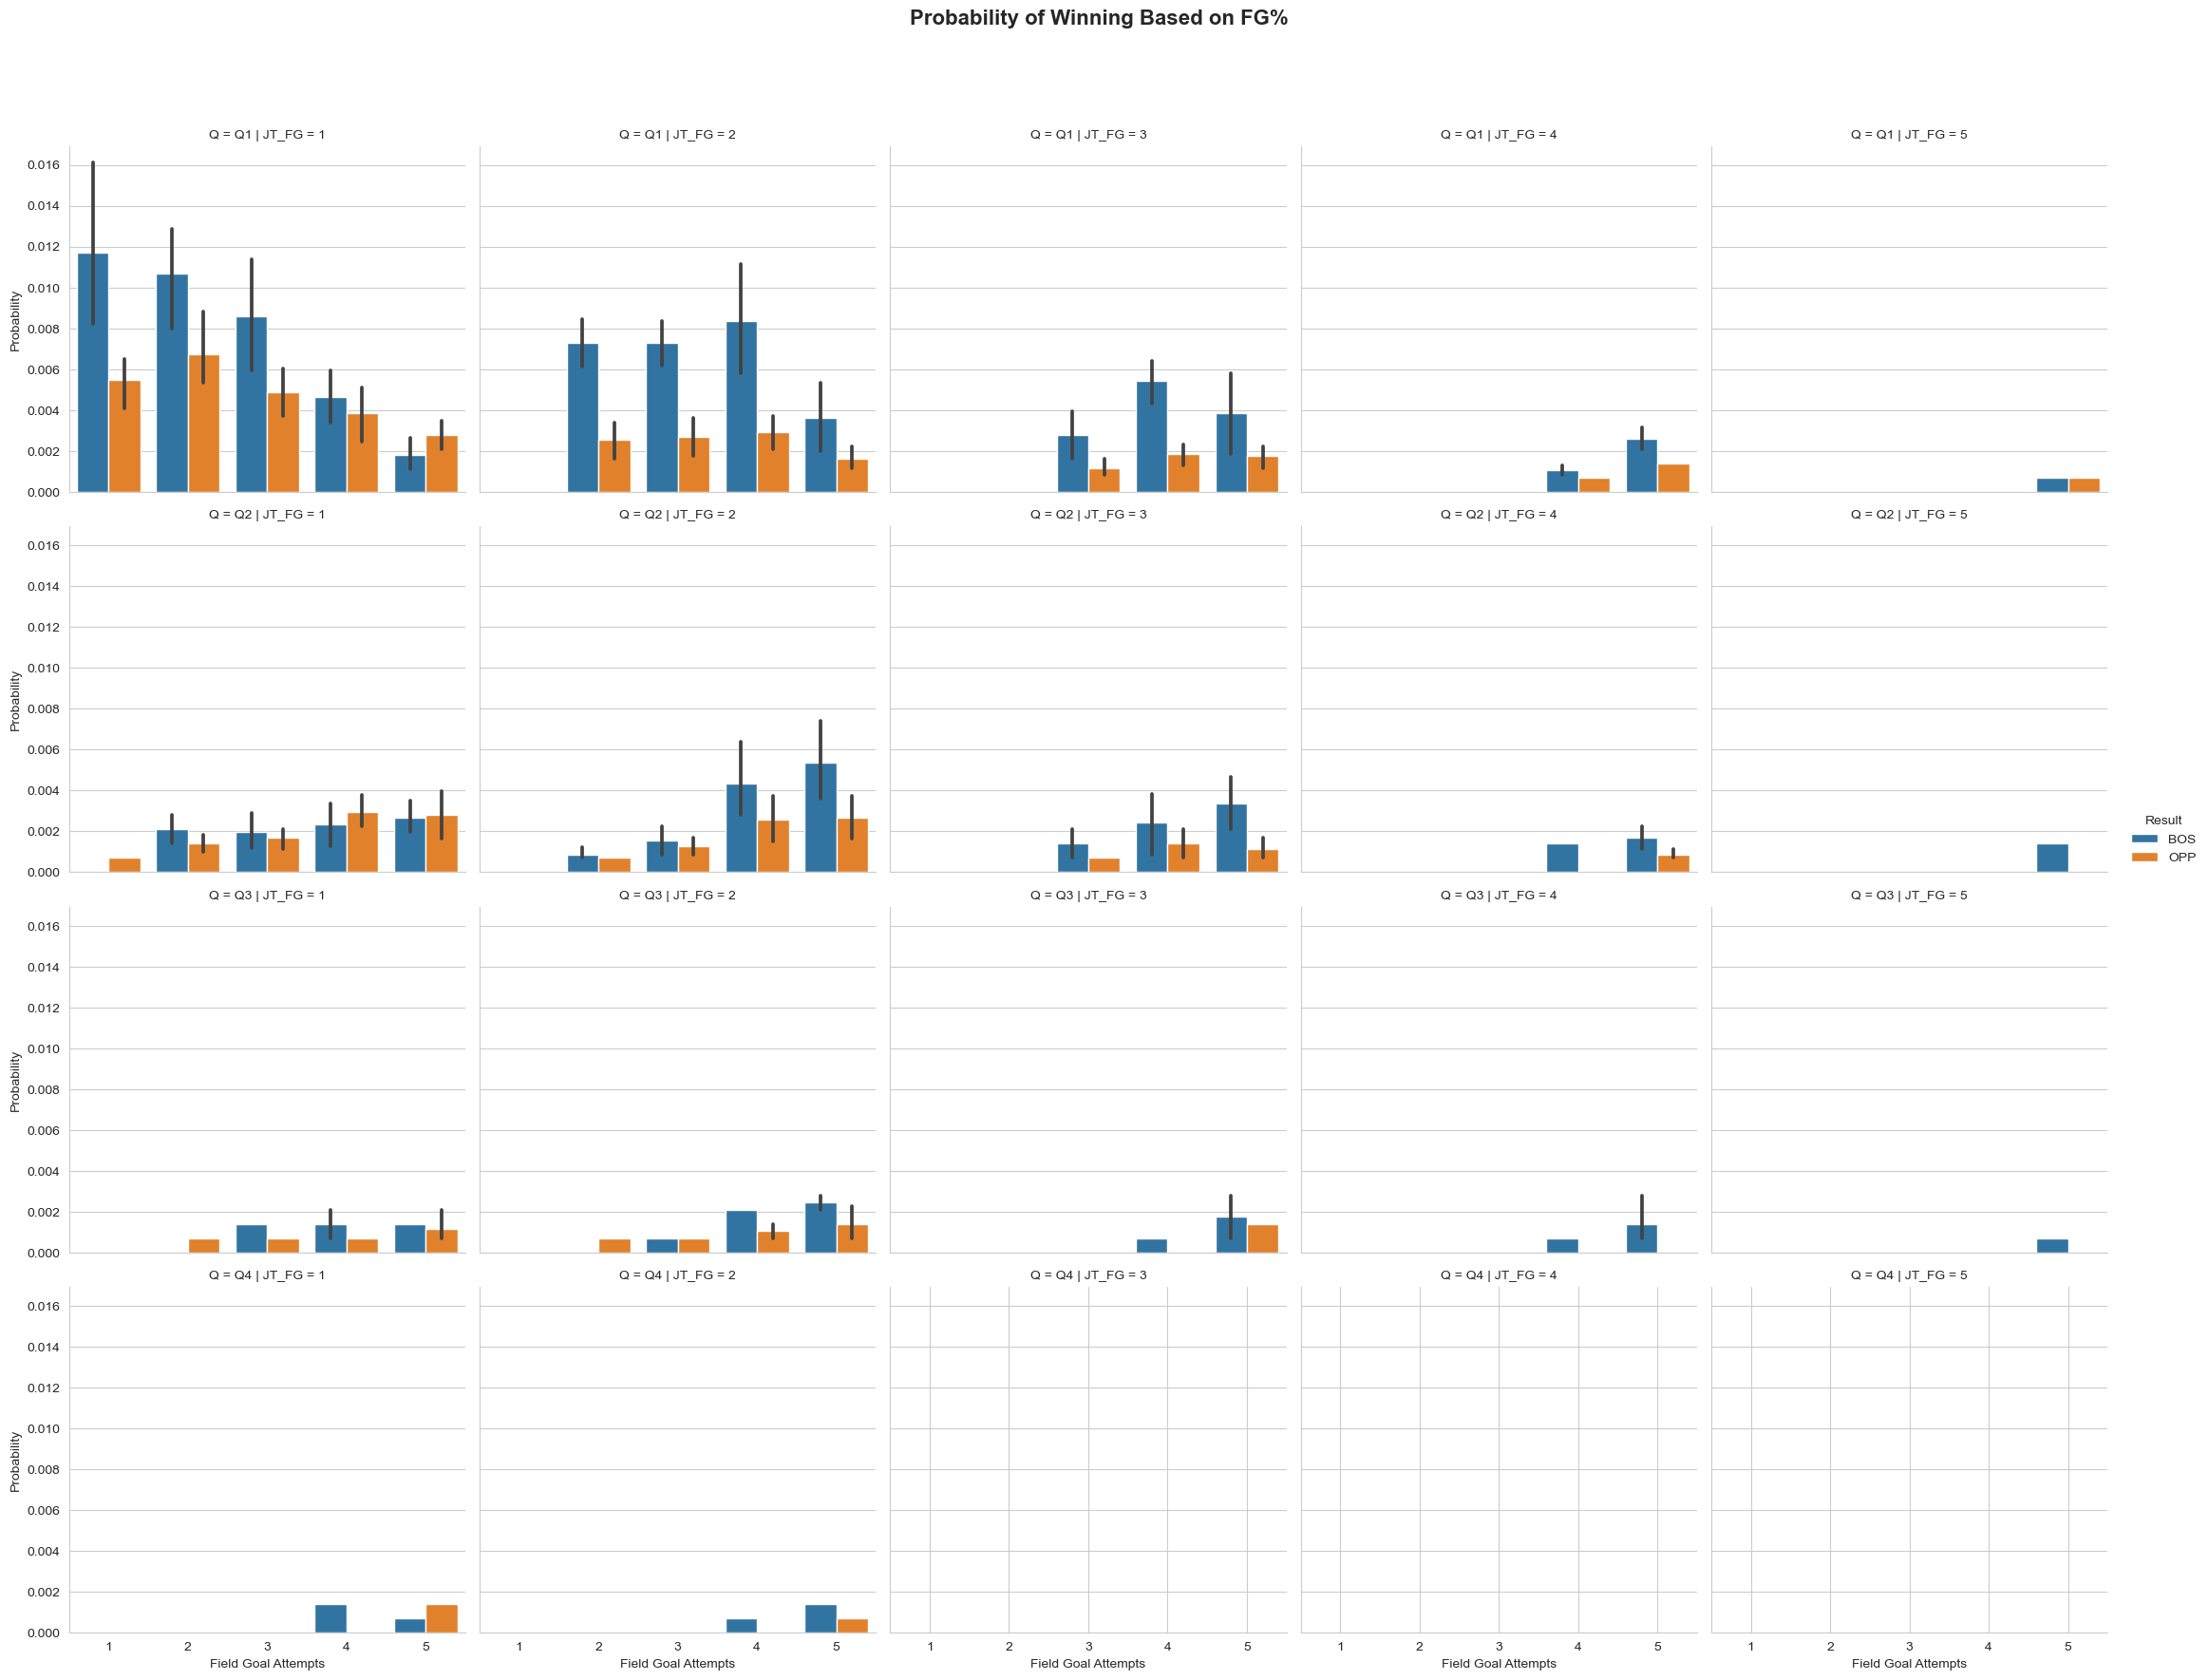

In [31]:
# Add a column for whether the player made or missed their first 5 shots in the game
f5 = JT[(JT['JT_FGA'] <= 5)&(JT['JT_FG']>= 1)]

# Group the data by year, quarter, outcome of the game, and whether the player made or missed their first 5 shots
grouped_df = f5.groupby(['Year', 'Q', 'Result', 'JT_FG', 'JT_FGA'])

# Calculate the percentage of games won by the player for each combination of year, quarter, outcome, and first 5 shots made/missed
win_percentages = grouped_df['Game'].nunique() / grouped_df['Game'].nunique().sum()

win_percentages = win_percentages.reset_index()

# Plot the data using seaborn
sns.set_style('whitegrid')
g = sns.catplot(x='JT_FGA', y='Game', hue='Result', col='JT_FG', row='Q', data=win_percentages, kind='bar', height=4.5, aspect=1)
# Set axis labels and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probability of Winning Based on FG%', fontsize=16, fontweight='bold')
g.set_axis_labels('Field Goal Attempts', 'Probability')

plt.show()

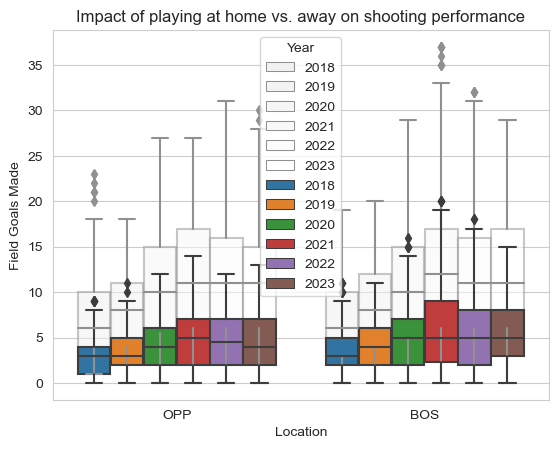

In [32]:
# Overlay a box plot of home vs. away performance for field goals made
sns.boxplot(data=JT, x='Result', y='JT_FGA', hue='Year', color='white', boxprops=dict(alpha=0.5))

# Create a bar plot of home vs. away performance
sns.boxplot(data=JT, x='Result', y='JT_FG', hue='Year')

# Add axis labels and title
sns.set_style("whitegrid")
plt.xlabel('Location')
plt.ylabel('Field Goals Made')
plt.title('Impact of playing at home vs. away on shooting performance')
plt.show()

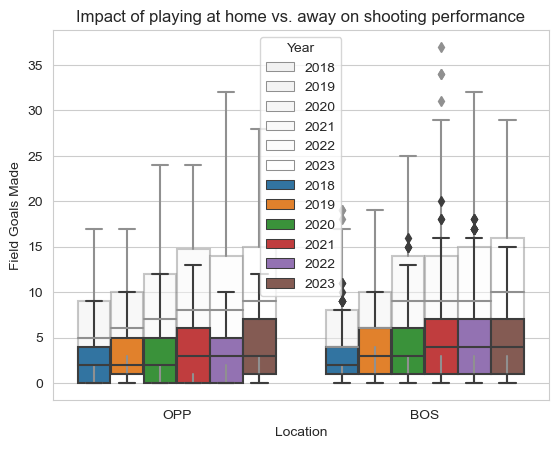

In [33]:
# Overlay a box plot of home vs. away performance for field goals made
sns.boxplot(data=JB, x='Result', y='JT_FGA', hue='Year', color='white',boxprops=dict(alpha=0.5))

# Create a bar plot of home vs. away performance
sns.boxplot(data=JB, x='Result', y='JT_FG', hue='Year')

# Add axis labels and title
sns.set_style("whitegrid")
plt.xlabel('Location')
plt.ylabel('Field Goals Made')
plt.title('Impact of playing at home vs. away on shooting performance')
plt.show()